# IS 590 Final Project: Relationship between School Facilities in different levels VS Enrollment Ratio in Schools in India

Hypothesis: There could be a direct or indirect realtionship between the water,electricity,computer, washroom facilities and Enrollment ratio in schools in each state in India.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bqplot
sns.set(style = "darkgrid", color_codes=True)
import ipywidgets as pw
import traitlets

In [2]:
df_enrol = pd.read_csv("GER_1.csv")


Choosing only year "2014 to 2015" - Common year among all the data sets:

In [84]:
df_enrolNew = df_enrol[df_enrol.Year == '2014-15']

In the year 2014-2015, India had total of 28 States and 8 Union territories:
(Dataset has one additional column as "All India" making it 37)
Curently total Union Territiories = 9

In [88]:
df_enrolNew['State_UT'].nunique()

37

In [87]:
df_enrolNew['State_UT'].values

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttaranchal', 'West Bengal', 'All India'], dtype=object)

Different Levels in Indian Education:

1) Primary-->  age-- 6 to 10 years
2) Upper Primary--> age-- 11 to 12 years
3) Secondary--> age -- 13 to 15 years
4) Higher Sec--> age-- 16 to 17 years




In [66]:
df_enrolNew['Average']=df_enrolNew[['Primary_Total','Upper_Primary_Total' ,'Secondary_Total', 'Higher_Secondary_Total']].mean(axis=1)

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Top 5 States with High Enrollment Ratio:

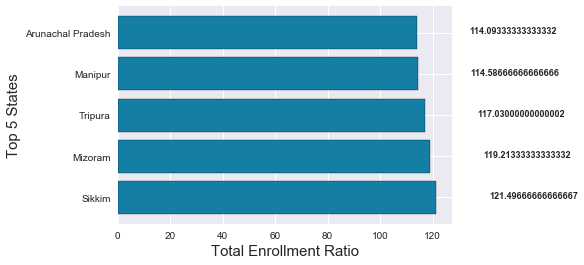

In [67]:
states = pd.DataFrame(df_enrolNew.groupby("State_UT")["Average"].sum())
Avg_state = states.sort_values(by='Average',ascending=False)
top_ten_states = Avg_state.iloc[0:5]
vals4 = top_ten_states["Average"].values

plt.barh(top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total Enrollment Ratio", fontsize = 15)
plt.ylabel("Top 5 States", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

5 States with Least Enrollment Ratio: 

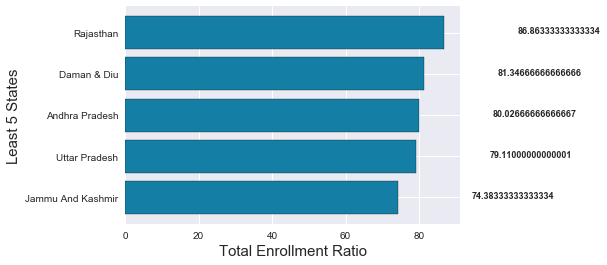

In [68]:
states = pd.DataFrame(df_enrolNew.groupby("State_UT")["Average"].sum())
Avg_state = states.sort_values(by='Average')
top_ten_states = Avg_state.iloc[0:5]
vals4 = top_ten_states["Average"].values

plt.barh(top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total Enrollment Ratio", fontsize = 15)
plt.ylabel("Least 5 States", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

Data Pre-Processing:
Forming a new dataframe combining the columns "Primary" "Upper_Primary" "Secondary" "Higher_Secondary" from all six datasets. 

In [4]:
df_E = df_enrol[df_enrol.Year == '2014-15']

In [5]:
df_E = df_E [['State_UT','Primary_Total','Upper_Primary_Total','Secondary_Total','Higher_Secondary_Total']]

In [6]:
df_E.columns=['State','E_Primary','E_Upper_Primary','E_Secondary','E_High_Sec']

In [7]:
df_E .head()

,State,E_Primary,E_Upper_Primary,E_Secondary,E_High_Sec
73,Andaman & Nicobar Islands,90.92,87.62,92.88,95.65
74,Andhra Pradesh,88.21,79.47,72.40,51.63
75,Arunachal Pradesh,128.13,122.53,91.62,68.71
76,Assam,114.96,95.86,74.78,33.97
77,Bihar,101.09,98.07,69.09,31.79


In [12]:
df_enrol.columns

Index(['State_UT', 'Year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total'],
      dtype='object')

In [15]:
df_comp = pd.read_csv("schools_with_computer.csv")
df_elec =  pd.read_csv("schools_with_electricity.csv")

In [16]:
df_comp.columns

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')

In [17]:
df_comp= df_comp[df_comp.year == '2014-15']

In [18]:
df_comp = df_comp [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [19]:
df_comp.columns=['State','C_Primary','C_Upper_Primary','C_Secondary','C_High_Sec']

In [20]:
df_comp.head()

,State,C_Primary,C_Upper_Primary,C_Secondary,C_High_Sec
1,Andaman & Nicobar Islands,30.94,76.54,0.00,100.00
4,Andhra Pradesh,10.29,44.15,76.59,66.67
7,Arunachal Pradesh,4.06,43.83,81.58,62.96
10,Assam,1.13,30.75,61.40,36.97
13,Bihar,2.29,11.15,15.14,46.43


In [21]:
df_elec= df_elec[df_elec.year == '2014-15']

In [22]:
df_elec = df_elec [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [23]:
df_elec.head()

,State_UT,Primary_Only,Primary_with_U_Primary,U_Primary_With_Sec,Sec_with_HrSec.
1,Andaman & Nicobar Islands,80.72,96.30,0.00,100.00
4,Andhra Pradesh,91.08,94.70,97.11,83.33
7,Arunachal Pradesh,21.53,54.96,92.11,100.00
10,Assam,11.50,56.42,75.75,59.51
13,Bihar,13.76,36.32,33.07,47.95


In [24]:
df_elec.columns=['State','EL_Primary','EL_Upper_Primary','EL_Secondary','EL_High_Sec']

In [25]:
df_water = pd.read_csv("schools_with_water_1.csv")


In [26]:
df_water= df_water[df_water.Year == '2014-15']

In [27]:
df_water.columns

Index(['State/UT', 'Year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')

In [28]:
df_water = df_water [['State/UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [29]:
df_water.columns=['State','W_Primary','W_Upper_Primary','W_Secondary','W_High_Sec']

In [30]:
df_water.head()

,State,W_Primary,W_Upper_Primary,W_Secondary,W_High_Sec
1,Andaman & Nicobar Islands,99.55,98.77,0.00,100.00
4,Andhra Pradesh,91.85,96.07,97.48,100.00
7,Arunachal Pradesh,73.34,89.99,94.74,88.89
10,Assam,81.76,92.63,94.17,85.56
13,Bihar,87.54,98.34,98.01,98.27


In [31]:
df_bwash = pd.read_csv("schools_with_btoilet.csv")
df_gwash = pd.read_csv("schools_with_gtoilet.csv")

In [32]:
df_bwash.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34


In [33]:
df_bwash= df_bwash[df_bwash.year == '2014-15']

In [34]:
df_bwash = df_bwash [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [35]:
df_bwash.columns=['State','B_Primary','B_Upper_Primary','B_Secondary','B_High_Sec']

In [36]:
df_bwash.head()

,State,B_Primary,B_Upper_Primary,B_Secondary,B_High_Sec
1,Andaman & Nicobar Islands,100.00,100.00,0.00,100.00
4,Andhra Pradesh,57.91,76.51,77.99,60.00
7,Arunachal Pradesh,94.13,98.59,96.43,100.00
10,Assam,55.26,69.61,67.36,55.96
13,Bihar,61.95,87.87,73.76,77.63


In [37]:
df_gwash= df_gwash[df_gwash.year == '2014-15']

In [38]:
df_gwash = df_gwash [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [39]:
df_gwash.columns=['State','G_Primary','G_Upper_Primary','G_Secondary','G_High_Sec']

In [40]:
df_gwash.head()

,State,G_Primary,G_Upper_Primary,G_Secondary,G_High_Sec
1,All India,91.21,96.92,96.61,94.05
4,Andaman & Nicobar Islands,100.00,100.00,0.00,100.00
7,Andhra Pradesh,97.79,98.81,99.03,100.00
10,Arunachal Pradesh,94.92,99.74,100.00,100.00
13,Assam,77.97,82.94,78.06,71.79


In [93]:
df1=pd.merge(df_E, df_comp, how='inner', on=['State'])

In [94]:
df1=pd.merge(df1, df_elec, how='inner', on=['State'])

In [95]:
df1=pd.merge(df1, df_water, how='inner', on=['State'])

In [96]:
df1=pd.merge(df1,df_bwash,how='inner', on=['State'])

In [97]:
df1=pd.merge(df1,df_gwash,how='inner', on=['State'])

In [98]:
df1.head()

,State,E_Primary,E_Upper_Primary,E_Secondary,E_High_Sec,C_Primary,C_Upper_Primary,C_Secondary,C_High_Sec,EL_Primary,...,W_Secondary,W_High_Sec,B_Primary,B_Upper_Primary,B_Secondary,B_High_Sec,G_Primary,G_Upper_Primary,G_Secondary,G_High_Sec
0,Andaman & Nicobar Islands,90.92,87.62,92.88,95.65,30.94,76.54,0.00,100.00,80.72,...,0.00,100.00,100.00,100.00,0.00,100.00,100.00,100.00,0.00,100.00
1,Andhra Pradesh,88.21,79.47,72.40,51.63,10.29,44.15,76.59,66.67,91.08,...,97.48,100.00,57.91,76.51,77.99,60.00,97.79,98.81,99.03,100.00
2,Arunachal Pradesh,128.13,122.53,91.62,68.71,4.06,43.83,81.58,62.96,21.53,...,94.74,88.89,94.13,98.59,96.43,100.00,94.92,99.74,100.00,100.00
3,Assam,114.96,95.86,74.78,33.97,1.13,30.75,61.40,36.97,11.50,...,94.17,85.56,55.26,69.61,67.36,55.96,77.97,82.94,78.06,71.79
4,Bihar,101.09,98.07,69.09,31.79,2.29,11.15,15.14,46.43,13.76,...,98.01,98.27,61.95,87.87,73.76,77.63,63.46,91.16,79.27,80.29


In [99]:
df1.columns

Index(['State', 'E_Primary', 'E_Upper_Primary', 'E_Secondary', 'E_High_Sec',
       'C_Primary', 'C_Upper_Primary', 'C_Secondary', 'C_High_Sec',
       'EL_Primary', 'EL_Upper_Primary', 'EL_Secondary', 'EL_High_Sec',
       'W_Primary', 'W_Upper_Primary', 'W_Secondary', 'W_High_Sec',
       'B_Primary', 'B_Upper_Primary', 'B_Secondary', 'B_High_Sec',
       'G_Primary', 'G_Upper_Primary', 'G_Secondary', 'G_High_Sec'],
      dtype='object')

In [103]:
choose_state = pw.Dropdown(description = "Choose State",
                            options = ['Andaman Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh',
                                       'Dadra Nagar Haveli','Daman Diu', 'Delhi', 'Goa', 'Gujarat', 
                                       'Haryana','Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
                                       'Karnataka', 'Kerala', 'Lakshadweep','Madhya Pradesh', 'Maharashtra', 
                                       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland','Odisha', 'Puducherry', 
                                       'Punjab', 'Rajasthan', 'Sikkim','Tamil Nadu', 'Telangana','Tripura','Uttar Pradesh',
                                       'Uttarakhand','West Bengal'],
                            value = "Tamil Nadu")
                         

Primary = df1.groupby("State")["E_Primary"].sum()
Upper_Primary = df1.groupby("State")["E_Upper_Primary"].sum()
Secondary = df1.groupby("State")["E_Secondary"].sum()
Higher_Secondary = df1.groupby("State")["E_High_Sec"].sum()
E_Primary = df1.groupby("State")["EL_Primary"].sum()
E_Upper_Primary = df1.groupby("State")["EL_Upper_Primary"].sum()
E_Secondary = df1.groupby("State")["EL_Secondary"].sum()
E_Higher_Secondary = df1.groupby("State")["EL_High_Sec"].sum()
C_Primary = df1.groupby("State")["C_Primary"].sum()
C_Upper_Primary = df1.groupby("State")["C_Upper_Primary"].sum()
C_Secondary = df1.groupby("State")["C_Secondary"].sum()
C_Higher_Secondary = df1.groupby("State")["C_High_Sec"].sum()
W_Primary = df1.groupby("State")["W_Primary"].sum()
W_Upper_Primary = df1.groupby("State")["W_Upper_Primary"].sum()
W_Secondary = df1.groupby("State")["W_Secondary"].sum()
W_Higher_Secondary = df1.groupby("State")["W_High_Sec"].sum()
B_Primary = df1.groupby("State")["B_Primary"].sum()
B_Upper_Primary = df1.groupby("State")["B_Upper_Primary"].sum()
B_Secondary = df1.groupby("State")["B_Secondary"].sum()
B_Higher_Secondary = df1.groupby("State")["B_High_Sec"].sum()
G_Primary = df1.groupby("State")["G_Primary"].sum()
G_Upper_Primary = df1.groupby("State")["G_Upper_Primary"].sum()
G_Secondary = df1.groupby("State")["G_Secondary"].sum()
G_Higher_Secondary = df1.groupby("State")["G_High_Sec"].sum()



def change_state(change):
    a = Primary[choose_state.value]
    b = Upper_Primary[choose_state.value]
    c = Secondary[choose_state.value]
    d = Higher_Secondary[choose_state.value]
    e= E_Primary[choose_state.value]
    f= E_Upper_Primary[choose_state.value]
    g= E_Secondary[choose_state.value]
    h= E_Higher_Secondary[choose_state.value]
    i= C_Primary[choose_state.value]
    j= C_Upper_Primary[choose_state.value]
    k= C_Secondary[choose_state.value]
    l= C_Higher_Secondary[choose_state.value]
    m= W_Primary[choose_state.value]
    n= W_Upper_Primary[choose_state.value]
    o= W_Secondary[choose_state.value]
    p= W_Higher_Secondary[choose_state.value]
    q= B_Primary[choose_state.value]
    r= B_Upper_Primary[choose_state.value]
    s= B_Secondary[choose_state.value]
    t= B_Higher_Secondary[choose_state.value]
    u= G_Primary[choose_state.value]
    v= G_Upper_Primary[choose_state.value]
    w= G_Secondary[choose_state.value]
    x= G_Higher_Secondary[choose_state.value]
     
       
    marks = (a,e,i,m,q,u,b,f,j,n,r,v,c,g,k,o,s,w,d,h,l,p,t,x)
    scatters.x = labels
    scatters.y = marks

labels = ("Primary","E","C","W","BW","GW","UpperPri","uE","uC","uW","uBW","uGW","Sec","sE","sC","sW","sBW","sGW","HSec","hE","hC","hW","hBW","hGW")
a= Primary["Tamil Nadu"]
b = Upper_Primary["Tamil Nadu"]
c = Secondary["Tamil Nadu"]
d = Higher_Secondary["Tamil Nadu"]
e= E_Primary["Tamil Nadu"]
f= E_Upper_Primary["Tamil Nadu"]
g= E_Secondary["Tamil Nadu"]
h= E_Higher_Secondary["Tamil Nadu"]
i= C_Primary["Tamil Nadu"]
j= C_Upper_Primary["Tamil Nadu"]
k= C_Secondary["Tamil Nadu"]
l= C_Higher_Secondary["Tamil Nadu"]
m= W_Primary["Tamil Nadu"]
n= W_Upper_Primary["Tamil Nadu"]
o= W_Secondary["Tamil Nadu"]
p= W_Higher_Secondary["Tamil Nadu"]
q= B_Primary["Tamil Nadu"]
r= B_Upper_Primary["Tamil Nadu"]
s= B_Secondary["Tamil Nadu"]
t= B_Higher_Secondary["Tamil Nadu"]
u= G_Primary["Tamil Nadu"]
v= G_Upper_Primary["Tamil Nadu"]
w= G_Secondary["Tamil Nadu"]
x= G_Higher_Secondary["Tamil Nadu"]



marks = [a,e,i,m,q,u,b,f,j,n,r,v,c,g,k,o,s,w,d,h,l,p,t,x]

choose_state.observe(change_state)

x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = "Facilities in Different Levels")
y_ax = bqplot.Axis(scale = y_sc , label = "Percentage", orientation = 'vertical')

tooltip = bqplot.Tooltip(fields = ["x","y"])
scatters = bqplot.Scatter(x = labels,
                         y = marks,
                         scales = {'x': x_sc, 'y': y_sc},
                         tooltip = tooltip,
                         colors=['#3182BD'], stroke='black')
fig = bqplot.Figure(marks = [scatters],axes =[x_ax, y_ax])

In [104]:
display(choose_state)
display(fig)

Dropdown(description='Choose State', index=28, options=('Andaman Nicobar Islands', 'Andhra Pradesh', 'Assam', …

Figure(axes=[Axis(label='Facilities in Different Levels', scale=OrdinalScale(), side='bottom'), Axis(label='Pe…